<a href="https://colab.research.google.com/github/Audorion/Heart-Disease-UCI-Kaggle/blob/main/End_to_end_heart_disease_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting

Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
7. Experementation

## 1.Problem definition

In a statement,
> Given clinical parameters

## 2.Data

Data from Cleavlend data from the UCI machine learning reposetory.
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

## 3.Evaluation

> if we can reach 95% accuracy at predicting whether or not patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features

Different information about patient.

## Preparing the tools

In [ ]:
# Regular EDA and plotting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

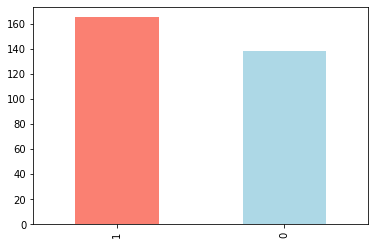

In [ ]:
df["target"].value_counts().plot(kind="bar", color=['salmon', 'lightblue']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


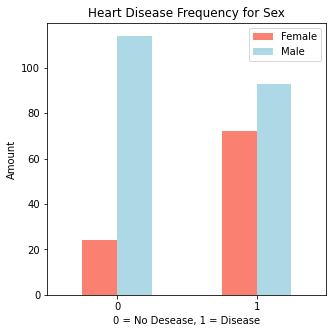

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(5,5),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Desease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max Heart Rate For Heart Disease


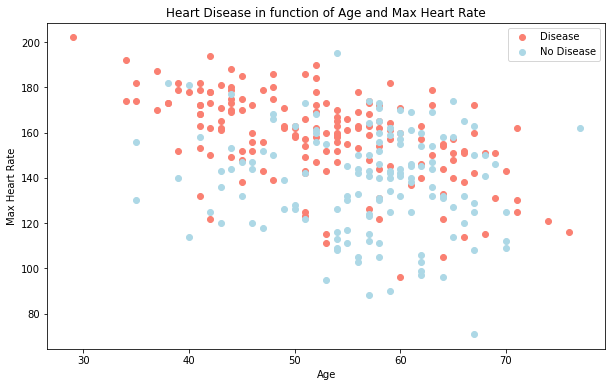

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

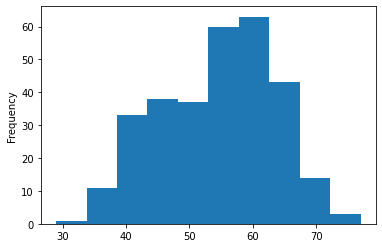

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

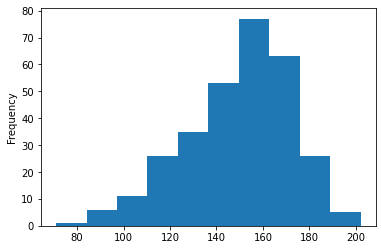

In [ ]:
df.thalach.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


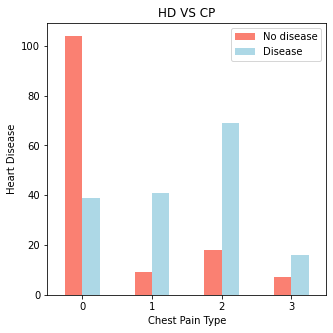

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(5,5),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("HD VS CP")
plt.xlabel("Chest Pain Type")
plt.ylabel("Heart Disease")
plt.legend(["No disease", "Disease"]);
plt.xticks(rotation=0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

In [ ]:
# Make a correlation metrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


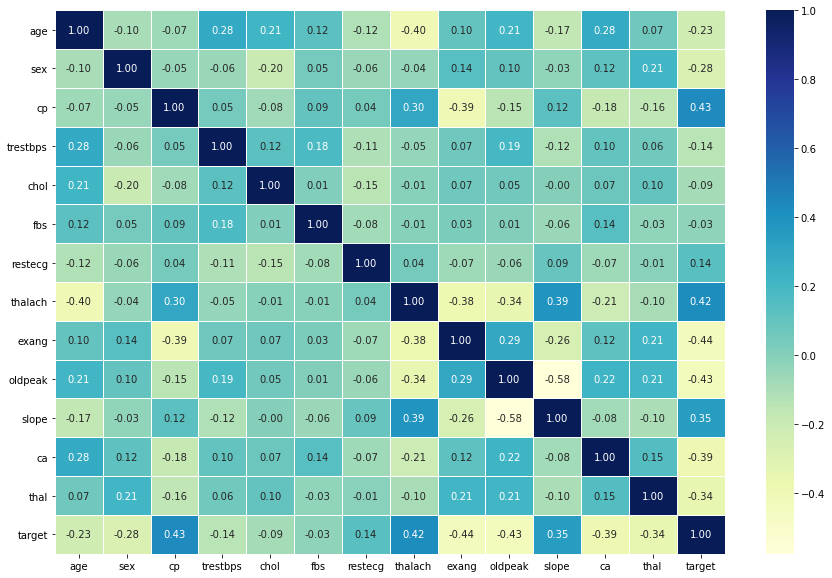

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modeling

In [ ]:
# Split data 
X = df.drop("target", axis=1)

y = df["target"]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
# Put models in dictionary
models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForest": RandomForestClassifier()}

# Fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [ ]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\max-2\Desktop\Anaconda\project_heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_score

{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### Model Comparison

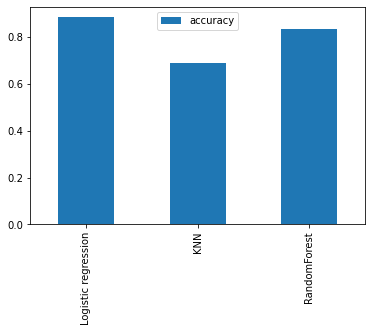

In [ ]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar();

### Tuning 


In [ ]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN intance 
knn = KNeighborsClassifier()

# Loop through
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


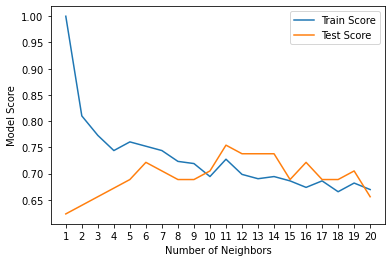

In [ ]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with randomized searchCV

Tune:
   * LogisticRegression
   * RandomForestClassifier
    ...

In [ ]:
# Create Grid LR
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create Grid for RFC
rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Tune LR

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Tune RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [ ]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test, y_test)

0.819672131147541

### Use GridSearchCV



In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ML classifier 

In [ ]:
# Make predictions with Tuned Model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

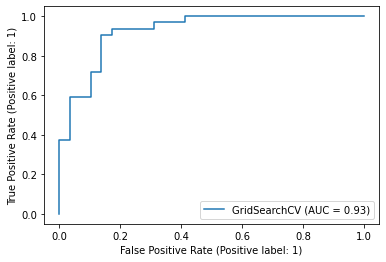

In [ ]:
# Plot Roc and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


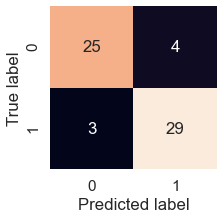

In [ ]:
sns.set(font_scale=1.4)
def plot_cond_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_cond_mat(y_test, y_preds)


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation using metrics using cross-validation

In [ ]:
# Check best hyperparemeters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-val accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
# Cross-val precision 
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
# Cross-val recall 
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
# Cross-val f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

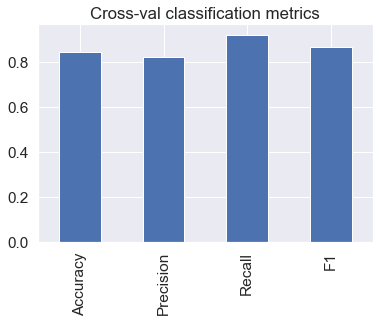

In [ ]:
# Visualize cross-val metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-val classification metrics", legend=False);

### Feature Importance 

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Fit an instance of LogReg
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [ ]:
# Match coef's of features to column
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

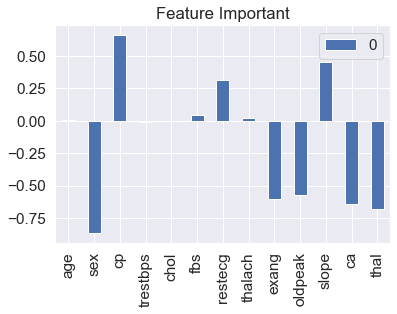

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Important");

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


### Experimentation

In [ ]:
# Try to use CatBoost
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

  Using cached catboost-0.26.1-cp39-none-win_amd64.whl (67.9 MB)
  Using cached graphviz-0.17-py3-none-any.whl (18 kB)


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [ ]:
from catboost import CatBoostClassifier, metrics, Pool, cv
from sklearn.metrics import accuracy_score
model = CatBoostClassifier(custom_loss=[metrics.Accuracy()],
                           random_seed=42)

In [ ]:
# Fit model
categorical_features_indices = np.where(X.dtypes != np.float)[0]
model.fit(X_train, y_train,
          cat_features=categorical_features_indices,
          plot=True)

<ipython-input-88-61149fc1e88b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X.dtypes != np.float)[0]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.005621
0:	learn: 0.6898252	total: 43.5ms	remaining: 43.5s
1:	learn: 0.6858480	total: 82.7ms	remaining: 41.3s
2:	learn: 0.6818890	total: 126ms	remaining: 41.9s
3:	learn: 0.6778309	total: 170ms	remaining: 42.4s
4:	learn: 0.6740276	total: 238ms	remaining: 47.4s
5:	learn: 0.6694461	total: 292ms	remaining: 48.3s
6:	learn: 0.6667014	total: 358ms	remaining: 50.7s
7:	learn: 0.6628084	total: 473ms	remaining: 58.6s
8:	learn: 0.6587354	total: 527ms	remaining: 58s
9:	learn: 0.6547513	total: 656ms	remaining: 1m 4s
10:	learn: 0.6507513	total: 752ms	remaining: 1m 7s
11:	learn: 0.6472635	total: 831ms	remaining: 1m 8s
12:	learn: 0.6435394	total: 876ms	remaining: 1m 6s
13:	learn: 0.6396511	total: 975ms	remaining: 1m 8s
14:	learn: 0.6370613	total: 1.03s	remaining: 1m 7s
15:	learn: 0.6337956	total: 1.11s	remaining: 1m 8s
16:	learn: 0.6300026	total: 1.22s	remaining: 1m 10s
17:	learn: 0.6263323	total: 1.27s	remaining: 1m 9s
18:	learn: 0.6227492	total: 1.33s	remaining: 1m 8s
19:	learn:

164:	learn: 0.3734566	total: 10.1s	remaining: 51.3s
165:	learn: 0.3729012	total: 10.2s	remaining: 51.4s
166:	learn: 0.3724118	total: 10.3s	remaining: 51.4s
167:	learn: 0.3716741	total: 10.4s	remaining: 51.3s
168:	learn: 0.3715172	total: 10.4s	remaining: 51.1s
169:	learn: 0.3701643	total: 10.4s	remaining: 51s
170:	learn: 0.3695406	total: 10.5s	remaining: 50.8s
171:	learn: 0.3687547	total: 10.5s	remaining: 50.8s
172:	learn: 0.3681438	total: 10.6s	remaining: 50.6s
173:	learn: 0.3675276	total: 10.7s	remaining: 50.8s
174:	learn: 0.3667897	total: 10.8s	remaining: 50.8s
175:	learn: 0.3661589	total: 10.9s	remaining: 50.8s
176:	learn: 0.3656961	total: 10.9s	remaining: 50.8s
177:	learn: 0.3647782	total: 11s	remaining: 50.6s
178:	learn: 0.3636606	total: 11s	remaining: 50.5s
179:	learn: 0.3630643	total: 11.1s	remaining: 50.4s
180:	learn: 0.3624256	total: 11.1s	remaining: 50.3s
181:	learn: 0.3618958	total: 11.2s	remaining: 50.4s
182:	learn: 0.3616807	total: 11.3s	remaining: 50.4s
183:	learn: 0.3611

326:	learn: 0.2853450	total: 19.8s	remaining: 40.8s
327:	learn: 0.2848047	total: 19.9s	remaining: 40.7s
328:	learn: 0.2843726	total: 19.9s	remaining: 40.6s
329:	learn: 0.2836262	total: 20s	remaining: 40.5s
330:	learn: 0.2834811	total: 20s	remaining: 40.4s
331:	learn: 0.2830981	total: 20s	remaining: 40.3s
332:	learn: 0.2830234	total: 20.1s	remaining: 40.2s
333:	learn: 0.2825878	total: 20.1s	remaining: 40.1s
334:	learn: 0.2821694	total: 20.2s	remaining: 40s
335:	learn: 0.2819109	total: 20.2s	remaining: 39.9s
336:	learn: 0.2814720	total: 20.3s	remaining: 39.9s
337:	learn: 0.2811058	total: 20.3s	remaining: 39.8s
338:	learn: 0.2807296	total: 20.4s	remaining: 39.7s
339:	learn: 0.2803965	total: 20.4s	remaining: 39.6s
340:	learn: 0.2800426	total: 20.5s	remaining: 39.5s
341:	learn: 0.2796277	total: 20.5s	remaining: 39.5s
342:	learn: 0.2791515	total: 20.6s	remaining: 39.4s
343:	learn: 0.2787530	total: 20.6s	remaining: 39.4s
344:	learn: 0.2783784	total: 20.7s	remaining: 39.3s
345:	learn: 0.278138

485:	learn: 0.2364416	total: 28.5s	remaining: 30.2s
486:	learn: 0.2360035	total: 28.7s	remaining: 30.2s
487:	learn: 0.2356607	total: 28.7s	remaining: 30.1s
488:	learn: 0.2353591	total: 28.8s	remaining: 30.1s
489:	learn: 0.2348845	total: 28.8s	remaining: 30s
490:	learn: 0.2347220	total: 28.9s	remaining: 29.9s
491:	learn: 0.2345346	total: 29s	remaining: 29.9s
492:	learn: 0.2344063	total: 29s	remaining: 29.8s
493:	learn: 0.2341510	total: 29.1s	remaining: 29.8s
494:	learn: 0.2338336	total: 29.1s	remaining: 29.7s
495:	learn: 0.2335841	total: 29.2s	remaining: 29.7s
496:	learn: 0.2333915	total: 29.3s	remaining: 29.6s
497:	learn: 0.2332049	total: 29.3s	remaining: 29.5s
498:	learn: 0.2330674	total: 29.4s	remaining: 29.5s
499:	learn: 0.2330161	total: 29.5s	remaining: 29.5s
500:	learn: 0.2328020	total: 29.5s	remaining: 29.4s
501:	learn: 0.2326003	total: 29.5s	remaining: 29.3s
502:	learn: 0.2321723	total: 29.6s	remaining: 29.2s
503:	learn: 0.2320110	total: 29.7s	remaining: 29.2s
504:	learn: 0.2318

646:	learn: 0.2006592	total: 38s	remaining: 20.7s
647:	learn: 0.2004196	total: 38s	remaining: 20.7s
648:	learn: 0.2001501	total: 38.1s	remaining: 20.6s
649:	learn: 0.1999867	total: 38.2s	remaining: 20.5s
650:	learn: 0.1997427	total: 38.2s	remaining: 20.5s
651:	learn: 0.1995571	total: 38.3s	remaining: 20.4s
652:	learn: 0.1992565	total: 38.3s	remaining: 20.4s
653:	learn: 0.1990582	total: 38.4s	remaining: 20.3s
654:	learn: 0.1988556	total: 38.4s	remaining: 20.2s
655:	learn: 0.1986745	total: 38.5s	remaining: 20.2s
656:	learn: 0.1986353	total: 38.5s	remaining: 20.1s
657:	learn: 0.1985045	total: 38.6s	remaining: 20.1s
658:	learn: 0.1984346	total: 38.7s	remaining: 20s
659:	learn: 0.1982888	total: 38.8s	remaining: 20s
660:	learn: 0.1980088	total: 38.8s	remaining: 19.9s
661:	learn: 0.1979291	total: 38.9s	remaining: 19.8s
662:	learn: 0.1977079	total: 38.9s	remaining: 19.8s
663:	learn: 0.1975197	total: 39s	remaining: 19.8s
664:	learn: 0.1971702	total: 39.1s	remaining: 19.7s
665:	learn: 0.1970842	

805:	learn: 0.1755464	total: 46.8s	remaining: 11.3s
806:	learn: 0.1752742	total: 46.8s	remaining: 11.2s
807:	learn: 0.1751114	total: 46.9s	remaining: 11.1s
808:	learn: 0.1748285	total: 46.9s	remaining: 11.1s
809:	learn: 0.1746388	total: 47s	remaining: 11s
810:	learn: 0.1746383	total: 47.1s	remaining: 11s
811:	learn: 0.1744474	total: 47.1s	remaining: 10.9s
812:	learn: 0.1743596	total: 47.2s	remaining: 10.9s
813:	learn: 0.1741235	total: 47.3s	remaining: 10.8s
814:	learn: 0.1739860	total: 47.3s	remaining: 10.7s
815:	learn: 0.1738147	total: 47.4s	remaining: 10.7s
816:	learn: 0.1737027	total: 47.4s	remaining: 10.6s
817:	learn: 0.1735920	total: 47.4s	remaining: 10.6s
818:	learn: 0.1734126	total: 47.5s	remaining: 10.5s
819:	learn: 0.1732714	total: 47.5s	remaining: 10.4s
820:	learn: 0.1729070	total: 47.6s	remaining: 10.4s
821:	learn: 0.1727126	total: 47.6s	remaining: 10.3s
822:	learn: 0.1726213	total: 47.7s	remaining: 10.3s
823:	learn: 0.1724971	total: 47.8s	remaining: 10.2s
824:	learn: 0.1723

964:	learn: 0.1530140	total: 55.7s	remaining: 2.02s
965:	learn: 0.1529062	total: 55.7s	remaining: 1.96s
966:	learn: 0.1527901	total: 55.8s	remaining: 1.9s
967:	learn: 0.1527026	total: 55.8s	remaining: 1.84s
968:	learn: 0.1525290	total: 55.9s	remaining: 1.79s
969:	learn: 0.1523478	total: 56s	remaining: 1.73s
970:	learn: 0.1521337	total: 56.1s	remaining: 1.67s
971:	learn: 0.1520874	total: 56.1s	remaining: 1.62s
972:	learn: 0.1520420	total: 56.2s	remaining: 1.56s
973:	learn: 0.1519721	total: 56.2s	remaining: 1.5s
974:	learn: 0.1518873	total: 56.2s	remaining: 1.44s
975:	learn: 0.1516101	total: 56.3s	remaining: 1.38s
976:	learn: 0.1514844	total: 56.3s	remaining: 1.32s
977:	learn: 0.1512574	total: 56.4s	remaining: 1.27s
978:	learn: 0.1511516	total: 56.4s	remaining: 1.21s
979:	learn: 0.1510419	total: 56.5s	remaining: 1.15s
980:	learn: 0.1509071	total: 56.5s	remaining: 1.09s
981:	learn: 0.1507898	total: 56.6s	remaining: 1.04s
982:	learn: 0.1507558	total: 56.7s	remaining: 980ms
983:	learn: 0.15

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [ ]:
# Model Cross-validation
cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6676723	test: 0.6700228	best: 0.6700228 (0)
1:	learn: 0.6470178	test: 0.6510744	best: 0.6510744 (1)
2:	learn: 0.6275250	test: 0.6348517	best: 0.6348517 (2)
3:	learn: 0.6102559	test: 0.6192933	best: 0.6192933 (3)
4:	learn: 0.5925994	test: 0.6053249	best: 0.6053249 (4)
5:	learn: 0.5785885	test: 0.5940463	best: 0.5940463 (5)
6:	learn: 0.5631184	test: 0.5796709	best: 0.5796709 (6)
7:	learn: 0.5479338	test: 0.5662506	best: 0.5662506 (7)
8:	learn: 0.5372633	test: 0.5573869	best: 0.5573869 (8)
9:	learn: 0.5258197	test: 0.5491002	best: 0.5491002 (9)
10:	learn: 0.5141736	test: 0.5381660	best: 0.5381660 (10)	total: 2.1s	remaining: 3m 8s
11:	learn: 0.5021036	test: 0.5275551	best: 0.5275551 (11)
12:	learn: 0.4902816	test: 0.5189902	best: 0.5189902 (12)
13:	learn: 0.4807923	test: 0.5113238	best: 0.5113238 (13)
14:	learn: 0.4734313	test: 0.5055687	best: 0.5055687 (14)
15:	learn: 0.4634992	test: 0.4971208	best: 0.4971208 (15)
16:	learn: 0.4555080	test: 0.4909806	best: 0.4909806 (16)
17:	l

135:	learn: 0.1723594	test: 0.3917176	best: 0.3886296 (97)
136:	learn: 0.1715690	test: 0.3918227	best: 0.3886296 (97)
137:	learn: 0.1710213	test: 0.3917371	best: 0.3886296 (97)
138:	learn: 0.1699405	test: 0.3915452	best: 0.3886296 (97)
139:	learn: 0.1692150	test: 0.3912906	best: 0.3886296 (97)
140:	learn: 0.1683400	test: 0.3917108	best: 0.3886296 (97)
141:	learn: 0.1672780	test: 0.3906871	best: 0.3886296 (97)
142:	learn: 0.1662825	test: 0.3910593	best: 0.3886296 (97)
143:	learn: 0.1653712	test: 0.3909428	best: 0.3886296 (97)
144:	learn: 0.1646092	test: 0.3914242	best: 0.3886296 (97)
145:	learn: 0.1638479	test: 0.3916306	best: 0.3886296 (97)
146:	learn: 0.1627987	test: 0.3922525	best: 0.3886296 (97)	total: 25.6s	remaining: 2m 28s
147:	learn: 0.1619523	test: 0.3925945	best: 0.3886296 (97)
148:	learn: 0.1614112	test: 0.3926746	best: 0.3886296 (97)
149:	learn: 0.1605213	test: 0.3929900	best: 0.3886296 (97)
150:	learn: 0.1602569	test: 0.3931196	best: 0.3886296 (97)
151:	learn: 0.1597267	tes

268:	learn: 0.0989021	test: 0.4041387	best: 0.3886296 (97)
269:	learn: 0.0986335	test: 0.4041762	best: 0.3886296 (97)
270:	learn: 0.0984799	test: 0.4041847	best: 0.3886296 (97)
271:	learn: 0.0981562	test: 0.4042127	best: 0.3886296 (97)
272:	learn: 0.0976373	test: 0.4039681	best: 0.3886296 (97)
273:	learn: 0.0972409	test: 0.4045196	best: 0.3886296 (97)
274:	learn: 0.0969668	test: 0.4045382	best: 0.3886296 (97)
275:	learn: 0.0964220	test: 0.4043853	best: 0.3886296 (97)	total: 47.9s	remaining: 2m 5s
276:	learn: 0.0960998	test: 0.4050474	best: 0.3886296 (97)
277:	learn: 0.0958525	test: 0.4055691	best: 0.3886296 (97)
278:	learn: 0.0957328	test: 0.4054949	best: 0.3886296 (97)
279:	learn: 0.0953716	test: 0.4055543	best: 0.3886296 (97)
280:	learn: 0.0951633	test: 0.4058785	best: 0.3886296 (97)
281:	learn: 0.0947430	test: 0.4060709	best: 0.3886296 (97)
282:	learn: 0.0942765	test: 0.4060856	best: 0.3886296 (97)	total: 49.4s	remaining: 2m 5s
283:	learn: 0.0937036	test: 0.4067012	best: 0.3886296 (

406:	learn: 0.0616454	test: 0.4261555	best: 0.3886296 (97)
407:	learn: 0.0614980	test: 0.4264767	best: 0.3886296 (97)
408:	learn: 0.0613610	test: 0.4268392	best: 0.3886296 (97)
409:	learn: 0.0612019	test: 0.4269029	best: 0.3886296 (97)
410:	learn: 0.0609994	test: 0.4272384	best: 0.3886296 (97)
411:	learn: 0.0608700	test: 0.4273884	best: 0.3886296 (97)
412:	learn: 0.0607633	test: 0.4275804	best: 0.3886296 (97)
413:	learn: 0.0606806	test: 0.4277282	best: 0.3886296 (97)	total: 1m 14s	remaining: 1m 46s
414:	learn: 0.0604738	test: 0.4278150	best: 0.3886296 (97)
415:	learn: 0.0602911	test: 0.4281728	best: 0.3886296 (97)
416:	learn: 0.0601083	test: 0.4282237	best: 0.3886296 (97)
417:	learn: 0.0600465	test: 0.4283307	best: 0.3886296 (97)	total: 1m 15s	remaining: 1m 45s
418:	learn: 0.0598065	test: 0.4281749	best: 0.3886296 (97)
419:	learn: 0.0595801	test: 0.4280689	best: 0.3886296 (97)
420:	learn: 0.0594720	test: 0.4282881	best: 0.3886296 (97)
421:	learn: 0.0593259	test: 0.4283584	best: 0.38862

538:	learn: 0.0437330	test: 0.4439768	best: 0.3886296 (97)
539:	learn: 0.0436537	test: 0.4440190	best: 0.3886296 (97)
540:	learn: 0.0435209	test: 0.4440073	best: 0.3886296 (97)
541:	learn: 0.0434511	test: 0.4440246	best: 0.3886296 (97)
542:	learn: 0.0433515	test: 0.4441101	best: 0.3886296 (97)
543:	learn: 0.0432934	test: 0.4442750	best: 0.3886296 (97)	total: 1m 39s	remaining: 1m 23s
544:	learn: 0.0431861	test: 0.4449370	best: 0.3886296 (97)
545:	learn: 0.0430825	test: 0.4449365	best: 0.3886296 (97)
546:	learn: 0.0429645	test: 0.4451423	best: 0.3886296 (97)
547:	learn: 0.0428209	test: 0.4452443	best: 0.3886296 (97)
548:	learn: 0.0426973	test: 0.4452825	best: 0.3886296 (97)
549:	learn: 0.0426408	test: 0.4452554	best: 0.3886296 (97)
550:	learn: 0.0426058	test: 0.4452289	best: 0.3886296 (97)
551:	learn: 0.0424865	test: 0.4451751	best: 0.3886296 (97)
552:	learn: 0.0424153	test: 0.4450786	best: 0.3886296 (97)
553:	learn: 0.0423400	test: 0.4452609	best: 0.3886296 (97)	total: 1m 40s	remaining:

674:	learn: 0.0341002	test: 0.4576830	best: 0.3886296 (97)
675:	learn: 0.0340445	test: 0.4578196	best: 0.3886296 (97)
676:	learn: 0.0340021	test: 0.4577558	best: 0.3886296 (97)
677:	learn: 0.0339236	test: 0.4573780	best: 0.3886296 (97)
678:	learn: 0.0338747	test: 0.4573526	best: 0.3886296 (97)
679:	learn: 0.0338147	test: 0.4574379	best: 0.3886296 (97)
680:	learn: 0.0337816	test: 0.4575657	best: 0.3886296 (97)
681:	learn: 0.0337354	test: 0.4577494	best: 0.3886296 (97)	total: 2m 3s	remaining: 57.8s
682:	learn: 0.0336964	test: 0.4576918	best: 0.3886296 (97)
683:	learn: 0.0336225	test: 0.4577387	best: 0.3886296 (97)
684:	learn: 0.0335122	test: 0.4581252	best: 0.3886296 (97)
685:	learn: 0.0334662	test: 0.4582701	best: 0.3886296 (97)
686:	learn: 0.0334385	test: 0.4583202	best: 0.3886296 (97)
687:	learn: 0.0334085	test: 0.4582892	best: 0.3886296 (97)
688:	learn: 0.0333298	test: 0.4583898	best: 0.3886296 (97)	total: 2m 5s	remaining: 56.5s
689:	learn: 0.0333073	test: 0.4585372	best: 0.3886296 (

805:	learn: 0.0275930	test: 0.4692350	best: 0.3886296 (97)
806:	learn: 0.0275645	test: 0.4694142	best: 0.3886296 (97)
807:	learn: 0.0275187	test: 0.4695080	best: 0.3886296 (97)
808:	learn: 0.0274437	test: 0.4697992	best: 0.3886296 (97)
809:	learn: 0.0273993	test: 0.4697761	best: 0.3886296 (97)
810:	learn: 0.0273623	test: 0.4697817	best: 0.3886296 (97)	total: 2m 26s	remaining: 34.2s
811:	learn: 0.0273383	test: 0.4696388	best: 0.3886296 (97)
812:	learn: 0.0272983	test: 0.4698742	best: 0.3886296 (97)
813:	learn: 0.0272777	test: 0.4699503	best: 0.3886296 (97)
814:	learn: 0.0272325	test: 0.4697343	best: 0.3886296 (97)
815:	learn: 0.0272039	test: 0.4698627	best: 0.3886296 (97)	total: 2m 27s	remaining: 33.3s
816:	learn: 0.0271575	test: 0.4699206	best: 0.3886296 (97)
817:	learn: 0.0271071	test: 0.4700076	best: 0.3886296 (97)
818:	learn: 0.0270409	test: 0.4701693	best: 0.3886296 (97)
819:	learn: 0.0270027	test: 0.4704158	best: 0.3886296 (97)
820:	learn: 0.0269674	test: 0.4707368	best: 0.3886296

941:	learn: 0.0225914	test: 0.4838489	best: 0.3886296 (97)
942:	learn: 0.0225498	test: 0.4840388	best: 0.3886296 (97)
943:	learn: 0.0225176	test: 0.4841065	best: 0.3886296 (97)
944:	learn: 0.0224858	test: 0.4841771	best: 0.3886296 (97)
945:	learn: 0.0224223	test: 0.4846089	best: 0.3886296 (97)
946:	learn: 0.0224086	test: 0.4846266	best: 0.3886296 (97)
947:	learn: 0.0223980	test: 0.4846525	best: 0.3886296 (97)
948:	learn: 0.0223651	test: 0.4846665	best: 0.3886296 (97)
949:	learn: 0.0223227	test: 0.4847359	best: 0.3886296 (97)
950:	learn: 0.0222942	test: 0.4849011	best: 0.3886296 (97)
951:	learn: 0.0222642	test: 0.4852677	best: 0.3886296 (97)
952:	learn: 0.0222254	test: 0.4853296	best: 0.3886296 (97)	total: 2m 51s	remaining: 8.46s
953:	learn: 0.0222026	test: 0.4853202	best: 0.3886296 (97)	total: 2m 51s	remaining: 8.29s
954:	learn: 0.0221923	test: 0.4853781	best: 0.3886296 (97)
955:	learn: 0.0221838	test: 0.4854787	best: 0.3886296 (97)
956:	learn: 0.0221423	test: 0.4856371	best: 0.3886296

In [ ]:
print(f"Best accuracy score: {np.max(cv_data['test-Accuracy-mean'])}")

Best accuracy score: 0.8415841584158416


##### Validation Score vs Standart Score
0.8415841584158416 and 0.8688524590163934

In [ ]:
# Try to use best_params and fit it one more time
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': metrics.Accuracy(),
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)
best_model_params = params.copy()
best_model_params.update({
    "use_best_model": True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool)
print(f"Accuracy of the best param model: {accuracy_score(y_test, model.predict(X_test))})

0.8524590163934426


In [ ]:
# Model Cross-validation for model with best params
cv_params = best_model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f"Best validation accuracy score: {np.max(cv_data['test-Accuracy-mean'])}")

Best validation accuracy score: 0.8514851485148515
